In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

In [2]:
def rand_cash(prob):
    return np.random.choice([0,10],p=prob)

In [3]:
def create_bandit(no_arms):
    bandit_dict ={}
    for i in range(no_arms):
        prob = random.random()
        bandit_dict[i] = [prob,1-prob]
    return bandit_dict

In [4]:
# bandit_dict = {1:[0.47,0.53],2:[0.27,0.73],3:[0.45,0.55],4:[0.69,0.31],5:[0.47,0.53],6:[0.27,0.73],7:[0.45,0.55],8:[0.69,0.31]}

In [5]:
def pull(arm,bandit_dict):
    return rand_cash(bandit_dict[arm])

In [6]:
#     print('action',arm)
#     print('reward',reward)
#     print('Increasing visit count at ',actions.index(arm))
#     print('N',N)
#     print('new Q value',(reward-Q[actions.index(arm)])/N[actions.index(arm)])
#     print('updated Q',Q)

In [7]:
def get_note(no_arms):
    actions = list(range(no_arms))
    Q = np.zeros(no_arms)
    N = np.zeros(no_arms)
    return actions,Q,N

In [8]:
### Recreate bandit
no_arms = 10
bandit_dict = create_bandit(no_arms=no_arms)

In [9]:
bandit_dict

{0: [0.986724361403828, 0.01327563859617198],
 1: [0.5955453789955268, 0.40445462100447316],
 2: [0.3982475837233248, 0.6017524162766752],
 3: [0.9663187446993843, 0.03368125530061572],
 4: [0.05782138813254145, 0.9421786118674585],
 5: [0.08819158573876162, 0.9118084142612384],
 6: [0.18249086834325268, 0.8175091316567473],
 7: [0.3788475607100852, 0.6211524392899148],
 8: [0.5742740586389333, 0.4257259413610667],
 9: [0.3934584082342517, 0.6065415917657483]}

In [10]:
### Clear records
epsilon = 0.01
actions,Q,N = get_note(no_arms=no_arms)

In [11]:
Q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
avg_reward = []
for j in range(500):
#     actions_dist = []
    rewards = []
    for i in range(j):
        if epsilon > random.random():
            arm = random.choice(actions)
        else:
            arm = actions[Q.argmax()]

#         actions_dist.append(arm)
        reward = pull(arm,bandit_dict)
        rewards.append(reward)
        N[arm] += 1
        Q[arm] += (reward-Q[arm])/N[arm]
        clear_output(wait=True)
        print(dict(zip(actions,["{:.2f}".format(i) for i in Q])))
    avg_reward.append(np.mean(rewards))

{0: '0.09', 1: '3.15', 2: '6.88', 3: '0.42', 4: '9.42', 5: '8.54', 6: '8.21', 7: '6.58', 8: '3.17', 9: '5.86'}


In [57]:
N

array([4.37000e+02, 1.35000e+02, 3.24000e+02, 1.48000e+02, 1.22000e+02,
       1.25000e+02, 1.16802e+05, 6.42500e+03, 1.17000e+02, 1.15000e+02])

In [58]:
Q

array([0.27459954, 6.44444444, 6.97530864, 1.35135135, 5.24590164,
       3.36      , 7.49173816, 7.12062257, 4.01709402, 2.7826087 ])

In [37]:
bandit_dict

{0: [0.5036708417806746, 0.49632915821932544],
 1: [0.9813318770660893, 0.018668122933910736],
 2: [0.8486056548441723, 0.15139434515582773],
 3: [0.9404374986193097, 0.0595625013806903],
 4: [0.15247831522115185, 0.8475216847788482],
 5: [0.03912784542474457, 0.9608721545752554],
 6: [0.40391033572712987, 0.5960896642728701],
 7: [0.9607444993667134, 0.039255500633286644]}

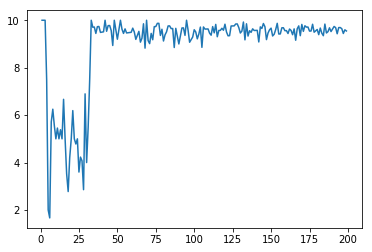

In [38]:
plt.plot(avg_reward)

### Pytorch Study

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(1,10)
#         self.softmax1 = nn.Softmax()
            
    def forward(self,x):
#         x = self.softmax1(self.fc1(x))
        x = self.fc1(x)
        return x

In [35]:
net = Net()

In [36]:
vl = torch.FloatTensor([1])

In [37]:
vl

tensor([1.])

In [38]:
target = torch.LongTensor([0])
optimizer1 = optim.Adam(params=net.parameters(),lr=0.1)
sm = nn.Softmax()
loss = nn.CrossEntropyLoss()

In [39]:
target

tensor([0])

In [40]:
net(vl)

tensor([ 0.9120,  0.8376,  0.0968, -1.0342, -1.0675,  0.5436, -0.2330, -0.3333,
        -1.4969,  0.7558], grad_fn=<AddBackward0>)

In [41]:
sm(net(vl))

/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.2043, 0.1896, 0.0904, 0.0292, 0.0282, 0.1413, 0.0650, 0.0588, 0.0184,
        0.1747], grad_fn=<SoftmaxBackward>)

In [30]:
vl[0].view(-1)

tensor([1.])

In [31]:
target

tensor([0])

In [42]:
optimizer1.zero_grad()
out = net(vl.view(-1))
print("Before backprop")
print(out)
print(sm(out))
loss_v = loss(out.view(-1,10), target)
loss_v.backward()
optimizer1.step()
print("After backprop")
print(net(vl.view(-1)))
print(sm(net(vl.view(-1))))

Before backprop
tensor([ 0.9120,  0.8376,  0.0968, -1.0342, -1.0675,  0.5436, -0.2330, -0.3333,
        -1.4969,  0.7558], grad_fn=<AddBackward0>)
tensor([0.2043, 0.1896, 0.0904, 0.0292, 0.0282, 0.1413, 0.0650, 0.0588, 0.0184,
        0.1747], grad_fn=<SoftmaxBackward>)
After backprop
tensor([ 1.1120,  0.6376, -0.1031, -1.2342, -1.2675,  0.3436, -0.4330, -0.5333,
        -1.6969,  0.5558], grad_fn=<AddBackward0>)
tensor([0.2769, 0.1723, 0.0822, 0.0265, 0.0256, 0.1284, 0.0591, 0.0534, 0.0167,
        0.1588], grad_fn=<SoftmaxBackward>)


/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
net =Net()
out_lst = []
sm_out_lst = []
loss_lst = []
optimizer1 = optim.Adam(params=net.parameters(),lr=0.001)
vl = torch.FloatTensor([1,2,3,4,1,1,1,1,4,5,6,7,8,9,1])
for i in vl:
    print('-------------',i,'------------------')
    optimizer1.zero_grad()
    out = net(i.view(-1))
    print(out)
    print(sm(out))
    out_lst.append(out)
    sm_out = sm(out)
    sm_out_lst.append(sm_out)
    output = loss(out.view(-1,10), target)
    loss_lst.append(output)
    output.backward()
    optimizer1.step()
    print(net(i.view(-1)))
    print(sm(net(i.view(-1))))

------------- tensor(1.) ------------------
tensor([ 0.5738, -0.0998, -0.0050, -0.9412,  1.2318,  1.1082,  0.7452,  0.4684,
         0.6598,  0.6610], grad_fn=<AddBackward0>)
tensor([0.0981, 0.0500, 0.0550, 0.0216, 0.1894, 0.1674, 0.1164, 0.0883, 0.1069,
        0.1070], grad_fn=<SoftmaxBackward>)
tensor([ 0.5938, -0.1198, -0.0250, -0.9612,  1.2118,  1.0882,  0.7252,  0.4484,
         0.6398,  0.6410], grad_fn=<AddBackward0>)
tensor([0.1017, 0.0498, 0.0548, 0.0215, 0.1886, 0.1667, 0.1160, 0.0879, 0.1065,
        0.1066], grad_fn=<SoftmaxBackward>)
------------- tensor(2.) ------------------
tensor([ 0.2933,  0.2178, -0.2340, -1.7817,  1.7833,  1.9486,  0.7607,  1.1040,
         0.4156,  1.3811], grad_fn=<AddBackward0>)
tensor([0.0494, 0.0458, 0.0291, 0.0062, 0.2190, 0.2584, 0.0788, 0.1110, 0.0558,
        0.1465], grad_fn=<SoftmaxBackward>)
tensor([ 0.3225,  0.1884, -0.2634, -1.8092,  1.7543,  1.9205,  0.7310,  1.0752,
         0.3862,  1.3526], grad_fn=<AddBackward0>)
tensor([0.0522, 

/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/Application/DataScience/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [442]:
out_lst

[tensor([-1.1472, -1.1883, -1.2490, -0.5227, -0.0541, -0.0662,  0.3454,  0.7738,
          1.0398, -0.5459], grad_fn=<AddBackward0>)]

In [423]:
sm_out_lst

[tensor([0.0835, 0.1783, 0.0863, 0.1236, 0.0327, 0.0624, 0.0914, 0.0215, 0.1793,
         0.1409], grad_fn=<SoftmaxBackward>),
 tensor([0.1197, 0.1712, 0.0829, 0.1187, 0.0314, 0.0600, 0.0878, 0.0207, 0.1722,
         0.1353], grad_fn=<SoftmaxBackward>),
 tensor([0.1686, 0.1617, 0.0783, 0.1121, 0.0297, 0.0566, 0.0829, 0.0195, 0.1626,
         0.1278], grad_fn=<SoftmaxBackward>),
 tensor([0.2323, 0.1493, 0.0723, 0.1035, 0.0274, 0.0523, 0.0766, 0.0180, 0.1502,
         0.1180], grad_fn=<SoftmaxBackward>),
 tensor([0.3110, 0.1340, 0.0649, 0.0929, 0.0246, 0.0469, 0.0687, 0.0162, 0.1348,
         0.1059], grad_fn=<SoftmaxBackward>),
 tensor([0.4025, 0.1162, 0.0563, 0.0806, 0.0213, 0.0407, 0.0596, 0.0140, 0.1169,
         0.0919], grad_fn=<SoftmaxBackward>),
 tensor([0.5012, 0.0970, 0.0470, 0.0673, 0.0178, 0.0340, 0.0498, 0.0117, 0.0976,
         0.0767], grad_fn=<SoftmaxBackward>),
 tensor([0.5998, 0.0778, 0.0377, 0.0540, 0.0143, 0.0273, 0.0399, 0.0094, 0.0783,
         0.0615], grad_fn=<Sof

In [424]:
loss_lst

[tensor(2.4825, grad_fn=<NllLossBackward>),
 tensor(2.1227, grad_fn=<NllLossBackward>),
 tensor(1.7800, grad_fn=<NllLossBackward>),
 tensor(1.4596, grad_fn=<NllLossBackward>),
 tensor(1.1678, grad_fn=<NllLossBackward>),
 tensor(0.9102, grad_fn=<NllLossBackward>),
 tensor(0.6908, grad_fn=<NllLossBackward>),
 tensor(0.5111, grad_fn=<NllLossBackward>),
 tensor(0.3696, grad_fn=<NllLossBackward>),
 tensor(0.2622, grad_fn=<NllLossBackward>),
 tensor(0.1831, grad_fn=<NllLossBackward>),
 tensor(0.1264, grad_fn=<NllLossBackward>),
 tensor(0.0864, grad_fn=<NllLossBackward>),
 tensor(0.0588, grad_fn=<NllLossBackward>),
 tensor(0.0398, grad_fn=<NllLossBackward>),
 tensor(0.0268, grad_fn=<NllLossBackward>),
 tensor(0.0181, grad_fn=<NllLossBackward>),
 tensor(0.0121, grad_fn=<NllLossBackward>),
 tensor(0.0082, grad_fn=<NllLossBackward>),
 tensor(0.0055, grad_fn=<NllLossBackward>)]